#### 1. Importing libraries


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob
import seaborn as sns

#### 2. Display the current workin directory using os.getcwd()

In [82]:
print(os.getcwd())
directory = r"D:\690\CollegeScorecard_Raw_Data"

C:\Users\Vivek Pandey


#### 3. OS library has a method call listdir which generates a list of files in a directory/folder

In [83]:
files  = os.listdir(directory)
# files = glob.glob("/CollegeScorecard_Raw_Data/*.csv")

print(files)

['.DS_Store', 'Crosswalks.zip', 'data.yaml', 'FieldOfStudyData1415_1516_PP.csv', 'FieldOfStudyData1516_1617_PP.csv', 'MERGED1996_97_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2000_01_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED2006_07_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED2017_18_PP.csv', 'MERGED2018_19_PP.csv']


#### 4. Removing unwanted files and filtering files based on Yearly data files

In [84]:
merged_files = [file for file in files if 'MERGED' in file]
print(merged_files)

['MERGED1996_97_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2000_01_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED2006_07_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED2017_18_PP.csv', 'MERGED2018_19_PP.csv']


#### 5. Loading the required columns and using "usecols"

In [85]:
directory = r"D:\690\CollegeScorecard_Raw_Data/"
df_list = []
def read(file):
    df = pd.read_csv(directory+file,usecols=['UNITID','INSTNM','STABBR','REGION','ADM_RATE','TUITIONFEE_IN'])
    year = file.split('_')[0].replace('MERGED','')
    df['year'] = year
    df_list.append(df)

for file in merged_files:
    read(file)

In [86]:
df_final = pd.concat(df_list)


#### 6. Exploring new Dataframe

In [87]:
df_final.shape

(163331, 7)

In [88]:
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163331 entries, 0 to 6805
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UNITID         163331 non-null  int64  
 1   INSTNM         163331 non-null  object 
 2   STABBR         163331 non-null  object 
 3   REGION         163330 non-null  float64
 4   ADM_RATE       44911 non-null   float64
 5   TUITIONFEE_IN  79194 non-null   float64
 6   year           163331 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 10.0+ MB


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [89]:
df_final.tail()


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
6801,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018
6805,49146401,ABC Adult School - Cabrillo Lane,CA,8.0,NaN,NaN,2018


In [90]:
df_final.isnull()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
0,False,False,False,False,True,True,False
1,False,False,False,False,True,True,False
2,False,False,False,False,True,True,False
3,False,False,False,False,True,True,False
4,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...
6801,False,False,False,False,True,False,False
6802,False,False,False,False,True,False,False
6803,False,False,False,False,True,True,False
6804,False,False,False,False,True,False,False


#### 7. Retrieving data of UMBC



In [91]:
df_umbc = df_final[df_final['INSTNM'] == 'University of Maryland-Baltimore County']


#### 8. Exploring data of UMBC



In [92]:
df_umbc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 2151 to 1415
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         23 non-null     int64  
 1   INSTNM         23 non-null     object 
 2   STABBR         23 non-null     object 
 3   REGION         23 non-null     float64
 4   ADM_RATE       18 non-null     float64
 5   TUITIONFEE_IN  19 non-null     float64
 6   year           23 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ KB


In [93]:
df_umbc.head()


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [94]:
df_umbc.isnull()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
2151,False,False,False,False,True,True,False
2049,False,False,False,False,True,True,False
1982,False,False,False,False,True,True,False
1955,False,False,False,False,True,True,False
1926,False,False,False,False,True,False,False
1915,False,False,False,False,False,False,False
1893,False,False,False,False,False,False,False
1873,False,False,False,False,False,False,False
1830,False,False,False,False,False,False,False
1819,False,False,False,False,False,False,False


#### 9. Plotting UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

<AxesSubplot:xlabel='year', ylabel='TUITIONFEE_IN'>

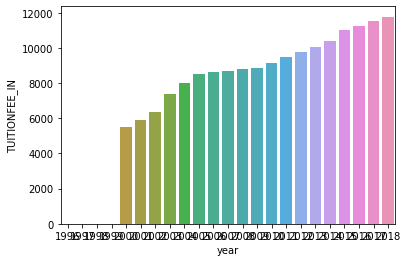

In [95]:
sns.barplot(x='year',y='TUITIONFEE_IN',data=df_umbc)

#### 10. Plotting UMBC's in-state tution overtime from 1996 to 2019 using Line Chart



<AxesSubplot:xlabel='year', ylabel='TUITIONFEE_IN'>

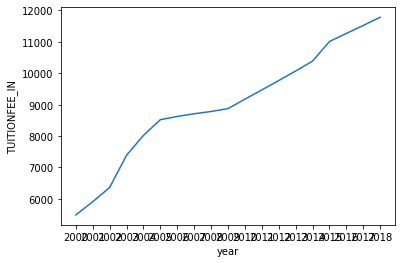

In [96]:
sns.lineplot(x='year',y='TUITIONFEE_IN',data=df_umbc)

#### 11. Converting the TUITIONFEE_IN column to a Python List to calculate change in %



In [97]:
changed_tuition = df_umbc['TUITIONFEE_IN'].tolist()

Calculating difference in percentage for each year



In [98]:
difference = [0]
for i in range(1,len(changed_tuition)):
    differ = (changed_tuition[i]-changed_tuition[i-1])/changed_tuition[i-1]
    difference.append(differ*100)


In [99]:
difference

[0,
 nan,
 nan,
 nan,
 nan,
 7.650273224043716,
 7.648054145516074,
 16.12700408676517,
 8.554412560909583,
 6.234413965087282,
 1.1971830985915493,
 0.9974483878450475,
 0.8268259072117593,
 1.0478359908883828,
 3.370153291253381,
 3.227565151019518,
 3.1372134783986483,
 3.11347808275297,
 3.1386571315057608,
 5.989984591679507,
 2.344175904052335,
 2.254971590909091,
 2.2573363431151243]

Rounding up the percentage change to 2 decimal points



In [100]:
round_up = []
for i in difference:
        round_up.append(round(i,2))
round_up

[0,
 nan,
 nan,
 nan,
 nan,
 7.65,
 7.65,
 16.13,
 8.55,
 6.23,
 1.2,
 1.0,
 0.83,
 1.05,
 3.37,
 3.23,
 3.14,
 3.11,
 3.14,
 5.99,
 2.34,
 2.25,
 2.26]

Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")



In [101]:
df_umbc['PCT_CHANGE'] = round_up


<ipython-input-101-286ac886abfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_umbc['PCT_CHANGE'] = round_up


Plotting tuition growth rate year over year 1. Bar Chart 2. Line Chart



<AxesSubplot:xlabel='year', ylabel='PCT_CHANGE'>

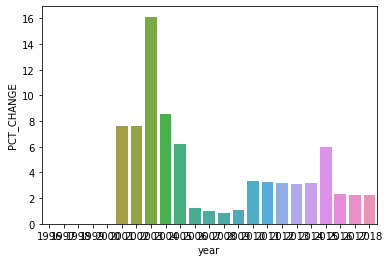

In [102]:
sns.barplot(x='year',y='PCT_CHANGE', data=df_umbc)

<AxesSubplot:xlabel='year', ylabel='PCT_CHANGE'>

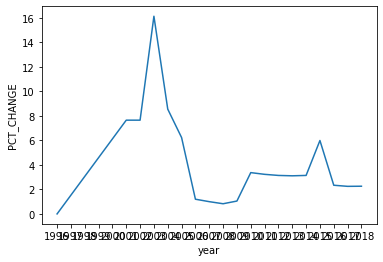

In [103]:
sns.lineplot(x='year',y='PCT_CHANGE', data=df_umbc)

#### 12. Function which takes list of tuitions and return a list of percentage changes year over year



In [104]:
def percent_changed(changed_tuition):
    difference = [0]
    for i in range(1,len(changed_tuition)):
        differ = (changed_tuition[i]-changed_tuition[i-1])/changed_tuition[i-1]
        difference.append(differ*100)
    round_up = []
    for i in difference:
        round_up.append(round(i,2))
    return round_up

#### 13. Data of JHU



In [105]:
df_jhu = df_final[df_final['INSTNM']=='Johns Hopkins University']
df_jhu.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 2139 to 1410
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         23 non-null     int64  
 1   INSTNM         23 non-null     object 
 2   STABBR         23 non-null     object 
 3   REGION         23 non-null     float64
 4   ADM_RATE       18 non-null     float64
 5   TUITIONFEE_IN  19 non-null     float64
 6   year           23 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ KB


In [106]:
df_jhu.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000


#### 14. Plotting JHU's in-state tuition overtime from 1996 to 2019



<AxesSubplot:xlabel='year', ylabel='TUITIONFEE_IN'>

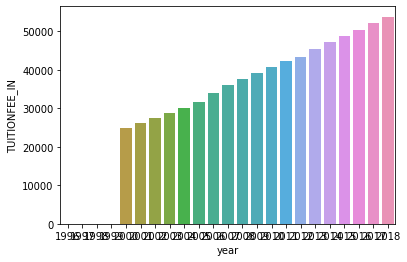

In [107]:
sns.barplot(x='year',y='TUITIONFEE_IN',data=df_jhu)

<AxesSubplot:xlabel='year', ylabel='TUITIONFEE_IN'>

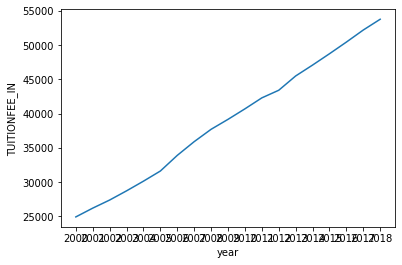

In [108]:
sns.lineplot(x='year',y='TUITIONFEE_IN',data=df_jhu)

#### 17. Make a bar plot of the JHU percentage changes tuitions over time





In [109]:
changed_tuition = df_jhu['TUITIONFEE_IN'].tolist()
jhu_difference = percent_changed(changed_tuition)

In [110]:
df_jhu['PCT_CHANGE'] = jhu_difference


<ipython-input-110-33802a894db1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jhu['PCT_CHANGE'] = jhu_difference


<AxesSubplot:xlabel='year', ylabel='PCT_CHANGE'>

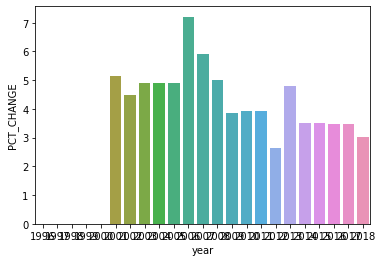

In [111]:
sns.barplot(x='year',y='PCT_CHANGE',data=df_jhu)


<AxesSubplot:xlabel='year', ylabel='PCT_CHANGE'>

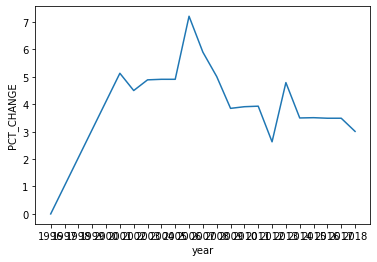

In [112]:
sns.lineplot(x='year',y='PCT_CHANGE',data=df_jhu)


#### 18. Plotting both UMBC and JHU tutuion change over time based on "YEAR"



In [113]:
umbc_new = df_umbc[['year']]
umbc_new['UMBC_PCT'] = df_umbc['PCT_CHANGE']

<ipython-input-113-c2f8782bdae1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umbc_new['UMBC_PCT'] = df_umbc['PCT_CHANGE']


In [114]:
umbc_new

,year,UMBC_PCT
2151,1996,0.00
2049,1997,NaN
1982,1998,NaN
1955,1999,NaN
1926,2000,NaN
1915,2001,7.65
1893,2002,7.65
1873,2003,16.13
1830,2004,8.55
1819,2005,6.23


In [115]:
jhu_new = df_jhu[['year']]
jhu_new['JHU_PCT'] = df_jhu['PCT_CHANGE']
jhu_new


<ipython-input-115-66f7c6f8b8f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jhu_new['JHU_PCT'] = df_jhu['PCT_CHANGE']


,year,JHU_PCT
2139,1996,0.00
2039,1997,NaN
1973,1998,NaN
1946,1999,NaN
1917,2000,NaN
1906,2001,5.13
1884,2002,4.50
1865,2003,4.89
1823,2004,4.91
1812,2005,4.91


Merging two dataframes and displaying the new dataframe



In [116]:
df_merge = pd.merge(umbc_new,jhu_new)
df_merge.head()

,year,UMBC_PCT,JHU_PCT
0,1996,0.0,0.0
1,1997,NaN,NaN
2,1998,NaN,NaN
3,1999,NaN,NaN
4,2000,NaN,NaN


Plot UMBC and JHU on a same plot

Ploting them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

<AxesSubplot:xlabel='year'>

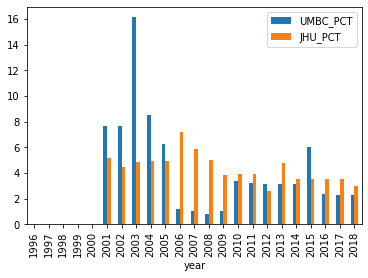

In [117]:
df_merge.plot.bar(x='year',y=["UMBC_PCT","JHU_PCT"])


<AxesSubplot:xlabel='year'>

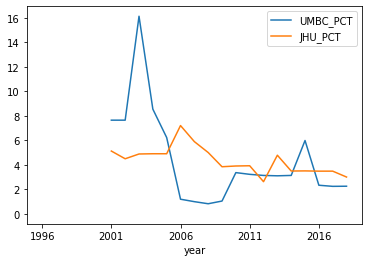

In [118]:
df_merge.plot.line(x='year',y=["UMBC_PCT","JHU_PCT"])


#### 19. Observation

According to my observation with the given data,after getting to a peak UMBC's percentage shift saw a great downfall till 2012. The percentage change for UMBC from 1996 to 2019 was the highest (16%). UMBC's percentage shift from 2005 to 2012 was lower than JHU's. From 1996 to 2019, JHU's percentage shift was between 3 and 7%. In comparision to JHU, UMBC's percentage change was higher in 2015, but it fell again from 2016 to 2019.